In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [101]:
img = cv2.imread('image1.jpg',0)

In [102]:
#FFT
f_img = np.fft.fft2(img)

In [103]:
f_img

array([[7795791.              +0.j        ,
         435483.75452634+1161834.18589034j,
         398846.41660094 -355674.41150195j, ...,
          23470.5132948  +281245.58101378j,
         398846.41660094 +355674.41150195j,
         435483.75452634-1161834.18589034j],
       [ 671822.2169203  -831062.20310865j,
        -572275.1620272  -765462.61877917j,
        -303577.28842364 +563051.2789807j , ...,
         -89382.34881723 -127960.87729705j,
         108286.34917031 +213267.34773273j,
        -207375.94543806 +232686.48353507j],
       [ 174355.53699052 -494564.83448496j,
        -204692.13877724 +228589.1126457j ,
          80790.36091381 +110764.12403957j, ...,
        -101907.67198178 +114056.86704841j,
         -56202.30419661  +81661.75106474j,
         183618.07698443 +107896.22336162j],
       ...,
       [-169487.92639454  +79847.33301843j,
        -102487.00449273  -36214.24577696j,
          50091.77786244 +123027.5887309j , ...,
        -114164.25133527 +127740.71295045

In [104]:
#Centered Spectrum
f_img_centered = np.fft.fftshift(f_img)

In [105]:
f_img_centered

array([[  2339.            +0.j        ,  -4940.1781162  +1140.00361131j,
         -1701.75161083 +6047.96448007j, ...,
          2189.42811193-12443.27524854j,  -1701.75161083 -6047.96448007j,
         -4940.1781162  -1140.00361131j],
       [ -9475.57604568 -9908.07547304j,   -944.70671758 +6568.97768684j,
         -6978.9544517    +82.47543835j, ...,
         11981.91232471-14691.15421958j,  -5828.64609687-10666.1668546j ,
           -97.05909436 +8988.81509213j],
       [  -766.22086876 -5759.02404498j,  -7029.57683383  +723.88734963j,
         -4075.02133444 -2341.83273287j, ...,
         10186.04584011 -3668.7754184j ,   4985.90163222 -5022.65355444j,
         -2816.64152173 +4446.60561856j],
       ...,
       [  8590.50296828+12591.67007234j,  -7059.47483631  +532.79364214j,
          6609.14807801+10683.77071325j, ...,
        -10418.60384721 -1626.66777876j,  -1357.77298409  -810.57683565j,
         -7915.46656069 +2313.76169571j],
       [  -766.22086876 +5759.02404498j,  -2

In [106]:
#Decentralized Spectrum
f_img_decentralized = np.fft.ifftshift(f_img_centered)

In [107]:
f_img_decentralized

array([[7795791.              +0.j        ,
         435483.75452634+1161834.18589034j,
         398846.41660094 -355674.41150195j, ...,
          23470.5132948  +281245.58101378j,
         398846.41660094 +355674.41150195j,
         435483.75452634-1161834.18589034j],
       [ 671822.2169203  -831062.20310865j,
        -572275.1620272  -765462.61877917j,
        -303577.28842364 +563051.2789807j , ...,
         -89382.34881723 -127960.87729705j,
         108286.34917031 +213267.34773273j,
        -207375.94543806 +232686.48353507j],
       [ 174355.53699052 -494564.83448496j,
        -204692.13877724 +228589.1126457j ,
          80790.36091381 +110764.12403957j, ...,
        -101907.67198178 +114056.86704841j,
         -56202.30419661  +81661.75106474j,
         183618.07698443 +107896.22336162j],
       ...,
       [-169487.92639454  +79847.33301843j,
        -102487.00449273  -36214.24577696j,
          50091.77786244 +123027.5887309j , ...,
        -114164.25133527 +127740.71295045

In [108]:
#Inverse FFT
img_reconstructed = np.fft.ifft2(f_img_decentralized)
img_reconstructed = np.abs(img_reconstructed)

In [109]:
img_reconstructed

array([[147., 169., 160., ..., 144., 148., 149.],
       [175., 130., 157., ..., 154., 164., 152.],
       [141., 176., 160., ..., 141., 147., 149.],
       ...,
       [ 76., 183., 130., ..., 120., 180.,  84.],
       [119., 118., 110., ..., 150., 138.,  94.],
       [117., 122., 104., ..., 150., 142.,  97.]])

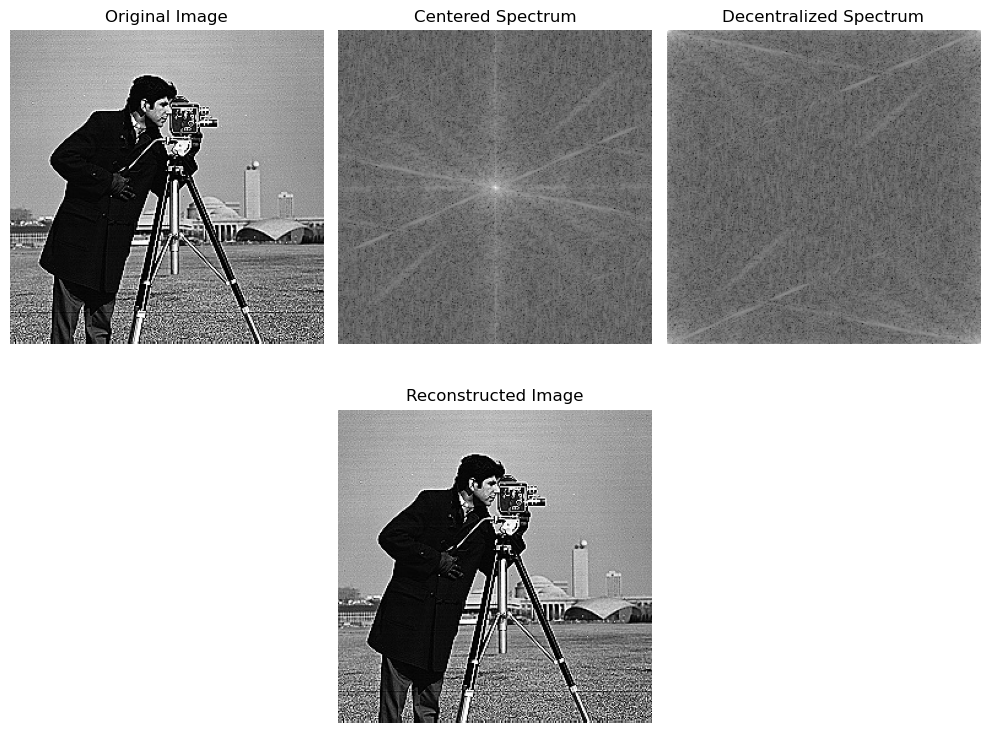

In [110]:
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(np.log(1 + np.abs(f_img_centered)), cmap='gray')
plt.title('Centered Spectrum'), plt.axis('off')

plt.subplot(233), plt.imshow(np.log(1 + np.abs(f_img_decentralized)), cmap='gray')
plt.title('Decentralized Spectrum'), plt.axis('off')

plt.subplot(235), plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image'), plt.axis('off')

plt.tight_layout()
plt.show()

In [111]:
pad_size = max(img.shape)
padded_img = cv2.copyMakeBorder(img, 0, pad_size-img.shape[0], 0, pad_size-img.shape[1], cv2.BORDER_REPLICATE)

In [112]:
f_img = np.fft.fft2(padded_img)
f_img_centered = np.fft.fftshift(f_img)
f_img_decentralized = np.fft.ifftshift(f_img_centered)
img_reconstructed = np.fft.ifft2(f_img_decentralized)
img_reconstructed = np.abs(img_reconstructed)

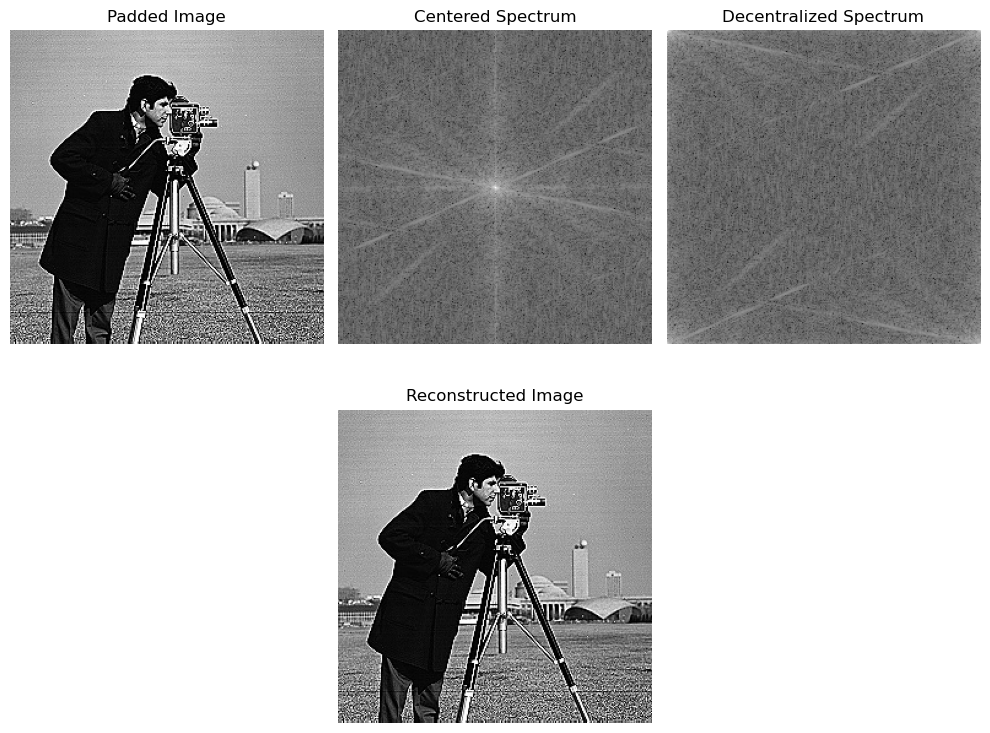

In [113]:
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(padded_img, cmap='gray')
plt.title('Padded Image'), plt.axis('off')

plt.subplot(232), plt.imshow(np.log(1 + np.abs(f_img_centered)), cmap='gray')
plt.title('Centered Spectrum'), plt.axis('off')

plt.subplot(233), plt.imshow(np.log(1 + np.abs(f_img_decentralized)), cmap='gray')
plt.title('Decentralized Spectrum'), plt.axis('off')

plt.subplot(235), plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image'), plt.axis('off')

plt.tight_layout()
plt.show()

In [114]:
def ILPF(img_shape, cutoff_freq):
    rows, cols = img_shape
    mask = np.zeros((rows, cols), np.uint8)
    radius = int(cutoff_freq)
    mask[rows//2 - radius: rows // 2 + radius, cols // 2 - radius: cols // 2 + radius] = 1
    return mask

In [115]:
def IHPF(img_shape, cutoff_freq):
    rows, cols = img_shape
    mask = np.ones((rows, cols), np.uint8)
    radius = int(cutoff_freq)
    mask[rows // 2 - radius: rows // 2 + radius, cols // 2 -radius:cols // 2 + radius] = 0
    return mask

In [116]:
f_img = np.fft.fft2(img)
f_img_shifted = np.fft.fftshift(f_img)

In [117]:
#cutoff frequencies for filters
cutoff_low = 30
cutoff_high = 30 

In [118]:
rows, cols = img.shape
ilpf_mask = ILPF((rows, cols), cutoff_low)
ihpf_mask = IHPF((rows, cols), cutoff_high)

In [119]:
f_img_filtered_low = f_img_shifted * ilpf_mask
f_img_filtered_high = f_img_shifted * ihpf_mask

f_img_low = np.fft.ifftshift(f_img_filtered_low)
f_img_high = np.fft.ifftshift(f_img_filtered_high)

img_filtered_low = np.fft.ifft2(f_img_low)
img_filtered_low = np.abs(img_filtered_low)
img_filtered_high = np.fft.ifft2(f_img_high)
img_filtered_high = np.abs(img_filtered_high)

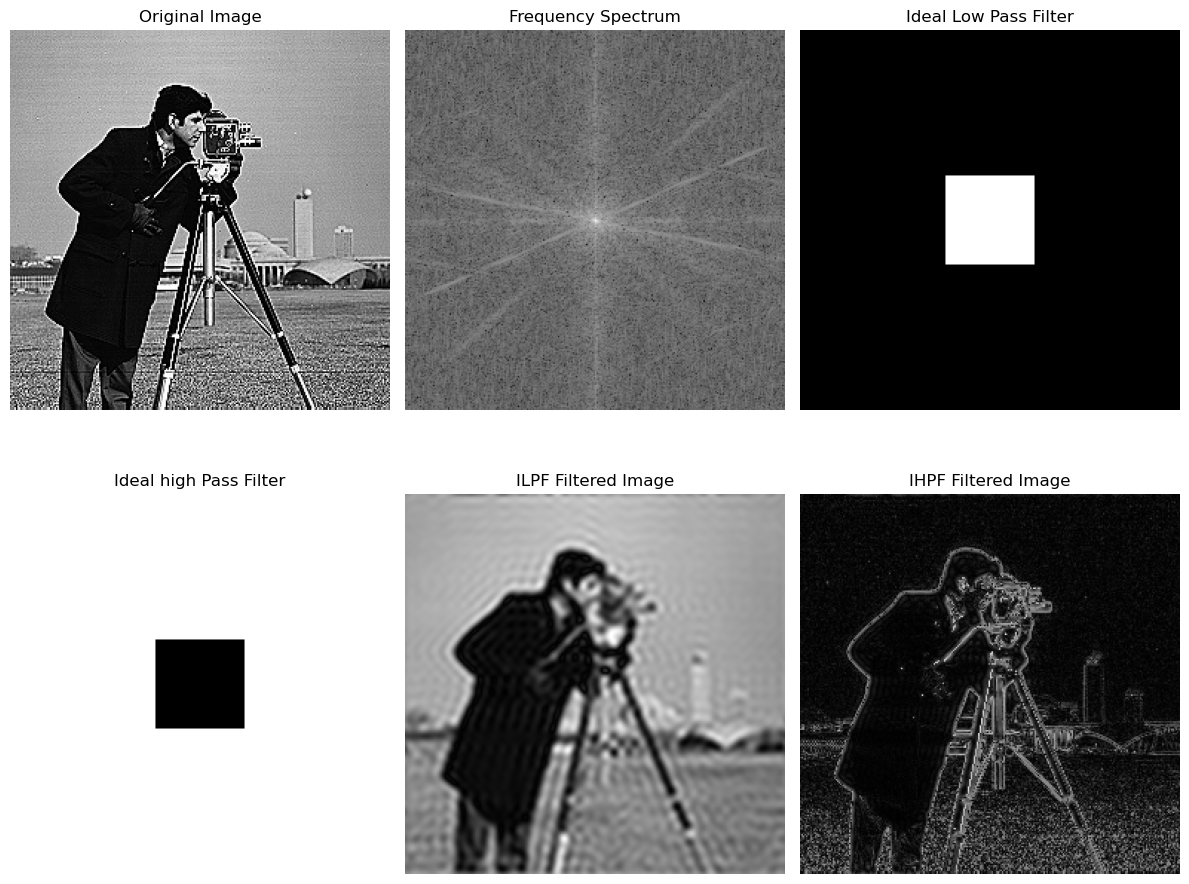

In [120]:
plt.figure(figsize=(12, 10))

plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(np.log(1 + np.abs(f_img_shifted)), cmap='gray')
plt.title('Frequency Spectrum'), plt.axis('off')

plt.subplot(233), plt.imshow(ilpf_mask, cmap='gray')
plt.title('Ideal Low Pass Filter'), plt.axis('off')

plt.subplot(234), plt.imshow(ihpf_mask , cmap='gray')
plt.title('Ideal high Pass Filter'), plt.axis('off')

plt.subplot(235), plt.imshow(img_filtered_low, cmap='gray')
plt.title('ILPF Filtered Image'), plt.axis('off')

plt.subplot(236), plt.imshow(img_filtered_high, cmap='gray')
plt.title('IHPF Filtered Image'), plt.axis('off')

plt.tight_layout()
plt.show()

In [121]:
img2 = cv2.imread('image2.jpg', 0)

In [122]:
kernel_sizes = [3, 5, 7, 9]
smoothed_images = []
for kernel_size in kernel_sizes:
    # Apply Gaussian blur
    smoothed = cv2.GaussianBlur(img2, (kernel_size, kernel_size), 0)
    smoothed_images.append(smoothed)

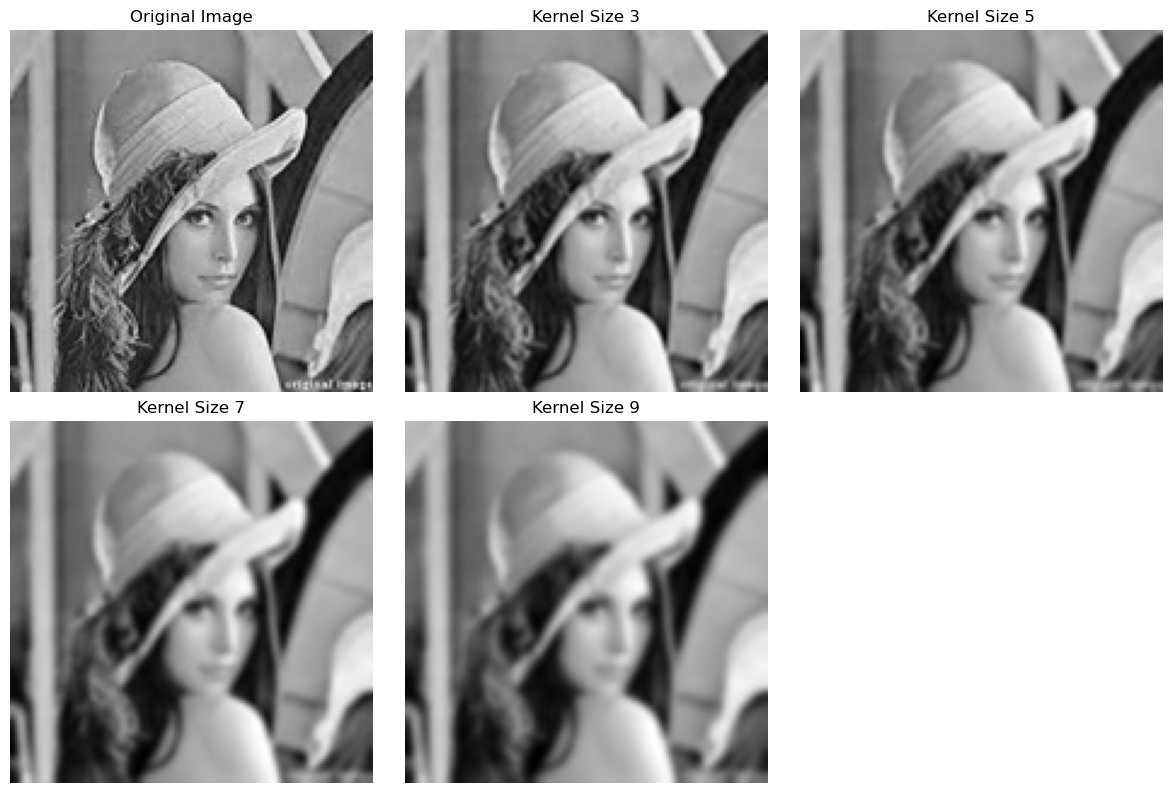

In [123]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(img2, cmap='gray')
plt.title('Original Image'), plt.axis('off')

for i, (smoothed, kernel_size) in enumerate(zip(smoothed_images, kernel_sizes), start=2):
    plt.subplot(2, 3, i), plt.imshow(smoothed, cmap='gray')
    plt.title(f'Kernel Size {kernel_size}'), plt.axis('off')

plt.tight_layout()
plt.show()

In [124]:
img_holes = cv2.imread('holes.jpg', 0)

In [125]:
#reduce noise
blurred = cv2.GaussianBlur(img_holes, (5, 5), 0)

In [126]:
#create a binary image
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)


In [127]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [128]:
#erosion and dilation
kernel = np.ones((6,6), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)

In [129]:
contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [130]:
num_holes = len(contours)
diameters = []

In [131]:
for contour in contours:
    # Calculate the diameter
    (x, y), radius = cv2.minEnclosingCircle(contour)
    diameter = 2 * radius
    diameters.append(diameter)

In [132]:
print(f'Number of Holes: {num_holes}')
print(f'Diameters of Holes (pixels): {diameters}')

Number of Holes: 7
Diameters of Holes (pixels): [69.20279693603516, 63.198299407958984, 98.23461151123047, 198.40634155273438, 201.85411071777344, 62.12909698486328, 194.23974609375]


In [133]:
output_img = cv2.cvtColor(img_holes, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_img, contours, -1, (0, 0, 255), 2)
cv2.imshow('Contours', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [144]:
img_holes = cv2.imread('holes.jpg', 0)
blurred = cv2.GaussianBlur(img_holes, (5, 5), 0)
edges = cv2.Canny(blurred, 100, 200)

In [145]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [146]:
centers = []
output_img = cv2.cvtColor(img_holes, cv2.COLOR_GRAY2BGR)

In [150]:
for contour in contours:
    center = (cv2.boundingRect(contour)[0] + cv2.boundingRect(contour)[2] // 2, cv2.boundingRect(contour)[1] + cv2.boundingRect(contour)[3]//2)
    (x,y) , radius = cv2.minEnclosingCircle(contour)
    diameter = 2 * radius
    if 5 <= diameter <= 40 and all(np.linalg.norm(np.array(center) - np.array(mycenter)) > diameter for mycenter in centers):
        centers.append(center)
        cv2.drawContours(output_img, [contour], -1, (0, 0, 255), 2)
        print(f"Diameter: {diameter} pixels")
print(f"All number of holes: {len(centers)}")
cv2.imshow('Contours', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Diameter: 37.41913604736328 pixels
Diameter: 37.68526840209961 pixels
Diameter: 21.023996353149414 pixels
Diameter: 37.811805725097656 pixels
All number of holes: 4
